In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.datasets import *
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer

### Выгрузка датасета

In [178]:
df = pd.read_csv("all_courses.csv")

### Информация о датасете

In [179]:
df.columns

Index(['Title', 'Type', 'Description', 'Level', 'Duration', 'Rating',
       'Review Count', 'Skills Covered', 'Prerequisites', 'Affiliates', 'URL'],
      dtype='object')

Форма датафрейма:

In [180]:
df.shape

(267, 11)

Типы колонок:

In [181]:
df.dtypes

Title              object
Type               object
Description        object
Level              object
Duration           object
Rating            float64
Review Count      float64
Skills Covered     object
Prerequisites      object
Affiliates         object
URL                object
dtype: object

Количество пропусков:

In [182]:
df.isnull().sum()

Title               0
Type                0
Description         6
Level               2
Duration            4
Rating            205
Review Count      205
Skills Covered      0
Prerequisites     187
Affiliates        129
URL                 0
dtype: int64

In [183]:
df = df [['Level', 'Rating', 'Review Count']]

In [184]:
df.head(10)

,Level,Rating,Review Count
0,intermediate,4.6,1802.0
1,beginner,4.7,864.0
2,intermediate,4.5,1126.0
3,beginner,4.8,2649.0
4,advanced,4.7,1212.0
5,beginner,4.7,3865.0
6,beginner,4.7,2418.0
7,intermediate,4.6,3496.0
8,intermediate,4.7,3368.0
9,beginner,4.7,1558.0


In [185]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 267


# Обработка пропусков в данных

### Обработка пропусков в числовых данных

Выберем числовые колонки с пропущенными значениями:

In [186]:
num_cols = []
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 205, 76.78%.
Колонка Review Count. Тип данных float64. Количество пустых значений 205, 76.78%.


Фильтр по колонкам с пропущенными значениями:

In [187]:
df_num = df[num_cols]
df_num

,Rating,Review Count
0,4.6,1802.0
1,4.7,864.0
2,4.5,1126.0
3,4.8,2649.0
4,4.7,1212.0
...,...,...
262,NaN,NaN
263,NaN,NaN
264,NaN,NaN
265,NaN,NaN


Гистограмма по признакам:

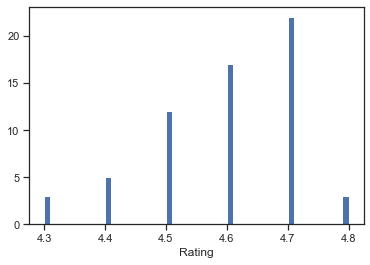

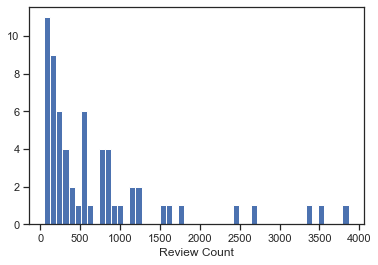

In [188]:
for col in df_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [189]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,62.0,4.595161,0.123378,4.3,4.5,4.6,4.7,4.8
Review Count,62.0,714.887097,856.714006,50.0,151.0,359.0,849.0,3865.0


In [190]:
df_num_Rating = df_num[['Rating']]
df_num_Rating

,Rating
0,4.6
1,4.7
2,4.5
3,4.8
4,4.7
...,...
262,NaN
263,NaN
264,NaN
265,NaN


In [191]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(df_num_Rating)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [192]:
#Стратегии заполнения
strategies=['mean', 'median', 'most_frequent']

In [193]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy = strategy_param)
    df_num_imp = imp_num.fit_transform(df_num_Rating)
    return df_num_imp[mask_missing_values_only]

In [194]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516129, 4.59516129, 4.59516129,
        4.59516129, 4.59516129, 4.59516

In [195]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6,
        4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.

In [196]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7,
        4.7, 4.7, 4.7, 4.7, 4.7, 

Т.к. в столбце Rating данные распределены одномодально, можно заполнить пропуски медианным значением.

In [197]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [198]:
df[['Review Count']].describe().T

,count,mean,std,min,25%,50%,75%,max
Review Count,62.0,714.887097,856.714006,50.0,151.0,359.0,849.0,3865.0


In [199]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [200]:
test_num_impute_col(df, 'Review Count', strategies[0])

('Review Count', 'mean', 205, 714.8870967741935, 714.8870967741935)

In [201]:
test_num_impute_col(df, 'Review Count', strategies[1])

('Review Count', 'median', 205, 359.0, 359.0)

In [202]:
test_num_impute_col(df, 'Review Count', strategies[2])

('Review Count', 'most_frequent', 205, 143.0, 143.0)

In [203]:
df['Review Count'] = df['Review Count'].fillna(df['Review Count'].median())

### Обработка пропусков в категориальных данных

In [204]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Level. Тип данных object. Количество пустых значений 2, 0.75%.


In [205]:
cat_temp_data = df[['Level']]
cat_temp_data.head()

,Level
0,intermediate
1,beginner
2,intermediate
3,beginner
4,advanced


In [206]:
cat_temp_data['Level'].unique()

array(['intermediate', 'beginner', 'advanced', nan], dtype=object)

In [207]:
cat_temp_data[cat_temp_data['Level'].isnull()].shape

(2, 1)

In [208]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['intermediate'],
       ['beginner'],
       ['intermediate'],
       ['beginner'],
       ['advanced'],
       ['beginner'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['beginner'],
       ['advanced'],
       ['intermediate'],
       ['intermediate'],
       ['advanced'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['intermediate'],
       ['intermediate'],
       ['intermediate'],
       ['advanced'],
       ['advanced'],
       ['intermediate'],
       ['advanced'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['intermediate'],
       ['advanced'],
       ['beginner'],
       ['advanced'],
       ['intermediate'],
       ['intermediate'],
       ['beginner'],
       ['advanced'],
       ['intermediate'],
       ['intermediate'],
     

In [209]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['advanced', 'beginner', 'intermediate'], dtype=object)

In [210]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['intermediate'],
       ['beginner'],
       ['intermediate'],
       ['beginner'],
       ['advanced'],
       ['beginner'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['beginner'],
       ['advanced'],
       ['intermediate'],
       ['intermediate'],
       ['advanced'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['intermediate'],
       ['intermediate'],
       ['intermediate'],
       ['advanced'],
       ['advanced'],
       ['intermediate'],
       ['advanced'],
       ['beginner'],
       ['intermediate'],
       ['intermediate'],
       ['intermediate'],
       ['advanced'],
       ['beginner'],
       ['advanced'],
       ['intermediate'],
       ['intermediate'],
       ['beginner'],
       ['advanced'],
       ['intermediate'],
       ['intermediate'],
     

In [211]:
np.unique(data_imp3)

array(['NA', 'advanced', 'beginner', 'intermediate'], dtype=object)

In [212]:
data_imp3[data_imp3=='NA'].size

2

В данном столбце маленький процент пропусков, соответственно, можно заполнить константным значением.

In [213]:
df['Level']= df['Level'].fillna('Unknown')

In [214]:
df.isnull().sum()

Level           0
Rating          0
Review Count    0
dtype: int64

# Преобразование категориальных признаков в числовые

In [215]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,intermediate
1,beginner
2,intermediate
3,beginner
4,advanced
...,...
262,intermediate
263,intermediate
264,intermediate
265,intermediate


# Кодирование категорий целочисленными значениями (label encoding)

In [228]:
cat_enc['c1'].unique()

array(['intermediate', 'beginner', 'advanced'], dtype=object)

In [229]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [230]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [231]:
le.classes_

array(['advanced', 'beginner', 'intermediate'], dtype=object)

In [232]:
le.inverse_transform([0, 1, 2])

array(['advanced', 'beginner', 'intermediate'], dtype=object)

# Кодирование категорий наборами бинарных значений

In [221]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(267, 1)

In [222]:
cat_enc_ohe.shape

(267, 3)

In [223]:
cat_enc_ohe

<267x3 sparse matrix of type '<class 'numpy.float64'>'
	with 267 stored elements in Compressed Sparse Row format>

In [224]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.]])

In [225]:
cat_enc.head(10)

,c1
0,intermediate
1,beginner
2,intermediate
3,beginner
4,advanced
5,beginner
6,beginner
7,intermediate
8,intermediate
9,beginner


In [226]:
pd.get_dummies(cat_enc).head()

,c1_advanced,c1_beginner,c1_intermediate
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0


In [227]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Level_advanced,Level_beginner,Level_intermediate,Level_nan
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


# Масштабирование данных

### MinMax масштабирование

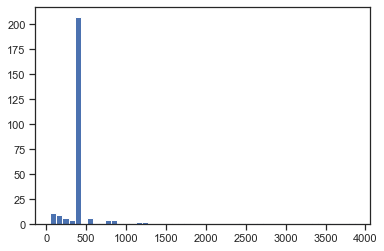

In [233]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['Review Count']])
plt.hist(df['Review Count'], 50)
plt.show()

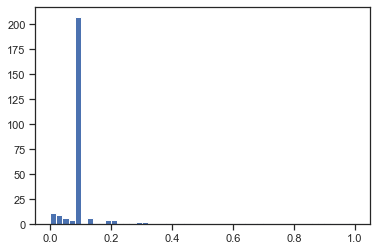

In [234]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

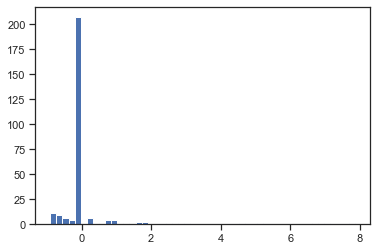

In [236]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df[['Review Count']])
plt.hist(sc2_data, 50)
plt.show()